In [1]:
"""
Author: Zulqar Nain 
Date: 7/4/2023
"""

'\nAuthor: Zulqar Nain \nDate: 7/4/2023\n'

# Data set

we have the x_rays data-set consist of 1600 jpeg files.

in this data set has two types of data as pictures
 1 normal patient x_ray pictures.
 2 pnemunia patient X_ray pictures.
 
our goal is to explain the dimensionality reduction by the help of the above explained data set.

### 1.first we convert all the images into numerical vaules (to store each image as a data point and store its pixels vaules)


In [2]:
#importing the packeges 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import cv2 
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### converting images to numerical vaules 

In [3]:
# this list will store the pixels vaule of normal images.
normal_images= []  
# this list will store the pixels vaule of pnemunia images.
p_images=[]        


# local system paths of images folders.
normal_path = 'D:/COURCES/MACHINE_LEARNING/practices/NORMAL'
pnemunia_path= 'D:/COURCES/MACHINE_LEARNING/practices/p_images'



# this will read an images an stored it on the above lists as numeric vaules.
for j in os.listdir(normal_path):
    normal_img = cv2.imread(normal_path+'/'+j,0)
    normal_img = cv2.resize(normal_img, (350, 350))
    p_img = cv2.imread(pnemunia_path+'/'+j,0)
    p_img = cv2.resize(p_img, (350, 350))    
    normal_images.append(normal_img)
    p_images.append(p_img)


In [4]:
# here we concatenate an convert the above lists into a 3D array
X = np.concatenate((normal_images,p_images))

# creating a label for normal is 0 and for pnemunia is 1
Y= np.concatenate((np.zeros(len(normal_images)), np.ones(len(p_images))))

In [5]:
X.shape


(1600, 350, 350)

### showing each images by giving its indexs from 1 to 1600.

PNEMUNIA PATIENT X_RAY


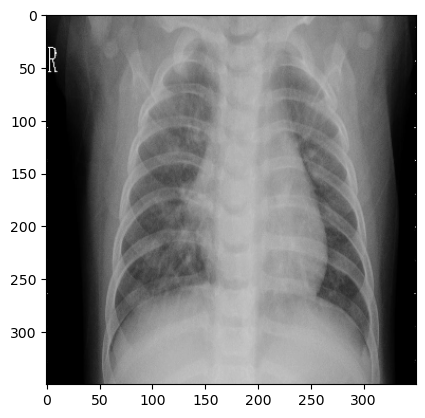

In [6]:
import matplotlib.pyplot as plt
index=1200
plt.imshow(X[index],cmap='gray')
if(Y[index]==0):
    print("NORMAL PATIENT X_RAY")
else:
    print("PNEMUNIA PATIENT X_RAY")

In [7]:

# we have a 3d arrays are formed from pictures and panda accepts of 2d arrays 
# so we reshaping the array into 2D 
two_D_array= X.reshape((1600,-1))

In [8]:
two_D_array.shape

(1600, 122500)

In [9]:
#now convert it into pandas data-frame
df=pd.DataFrame(two_D_array)

In [10]:
df.shape


(1600, 122500)

#As we analayze that we have 1000 data points and each datapoints having 122500 dimensions or features we cannot t visulize 
and analyze this data because it have a huge dimensions.. 

 # What we do here.?
now a Mathematics provides such a pretty solutions known as

   # 1. PCA (PRINCIPLE COMPONENTS ANALYSIS).
   
   # 2.TSNE (T-DISTRIBUTED STOCHASTIC NIGHBOURHOOD EMBEDDING)
   
    note:(there are some other methods in mathematics but now a days the above are much useful.)

# 1.PCA.

In [11]:
# packege
from sklearn.decomposition import PCA

In [12]:
#creating an instance of pca class 

# n_components mean how many components you wants to reduce your data-set
pca=PCA(n_components=2)


In [13]:
x_reduced=pca.fit_transform(df)

In [14]:
x_reduced.shape

(1600, 2)

In [15]:
reduced_df=pd.DataFrame(x_reduced,columns=("first_feature","second_feature"))
reduced_df["labels"]=Y
reduced_df.head(30)

,first_feature,second_feature,labels
0,272.566356,-1394.630539,0.0
1,-7168.127386,-4969.626120,0.0
2,-2597.392667,6026.448780,0.0
3,4323.242674,3344.158852,0.0
4,-7316.757296,544.632140,0.0
5,5894.702050,3268.064401,0.0
6,1015.097918,-2013.087497,0.0
7,3810.538842,4483.032097,0.0
8,-5162.561237,-3953.959489,0.0
9,-9711.680602,-5165.408974,0.0


C:\Users\ZULQARNAIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


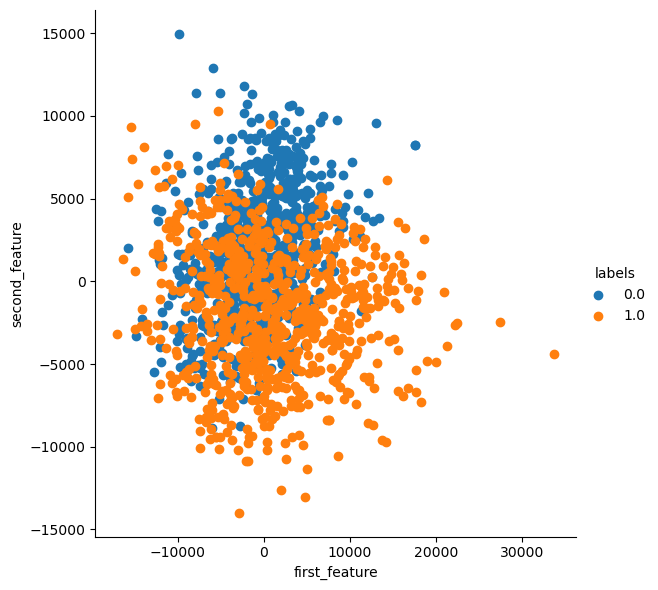

In [16]:
import seaborn as sns

sns.FacetGrid(data=reduced_df,hue="labels",size=6).map(plt.scatter,'first_feature','second_feature').add_legend()
plt.show()

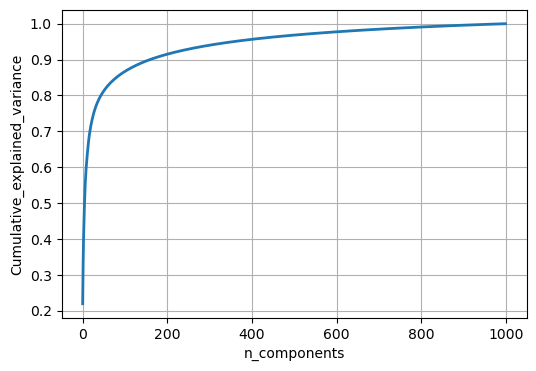

In [17]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 1000
pca_data = pca.fit_transform(two_D_array)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 180-185 -dimensions, approx. 90% of variance is expalined.

## Limitation of PCA

Linear nature:
    PCA is a linear transformation, which means it is not suitable for datasets with nonlinear relationships among variables.
    In such cases, nonlinear dimensionality reduction techniques like t-SNE and UMAP may be more appropriate.

Loss of information:
    PCA is a technique that minimizes the reconstruction error by projecting the data onto the first few principal components.
    However, this projection results in some loss of information, and the smaller the number of principal components retained,
    the more information is lost.

Interpretability:
    Although PCA can reduce the dimensionality of data, the new dimensions do not have a straightforward interpretation. 
    This can make it difficult to understand the relationships between the original variables and the new dimensions.

Outliers:
    PCA is sensitive to outliers in the data, which can have a significant impact on the resulting principal components and
    their associated variance.

Curse of dimensionality:
    PCA can also suffer from the curse of dimensionality, where the number of required principal components to capture most of
    the variation in the data increases exponentially with the number of dimensions.

In terms of visualization, PCA has some limitations as well. For example, PCA can only visualize a subset of the data, usually
two or three dimensions. This limitation can make it difficult to capture the full structure of the high-dimensional data.
Moreover, PCA visualization can suffer from information loss and distortion, especially when projecting high-dimensional data
onto a low-dimensional space


# 2.T-SNE

T-sne is also aternative of PCA. 
The PCA preserved the global structure of the data.
while T-sne preserved the local structure of the data.
BUt one of the most pretty quality of t-sne is thats prserve the distances of neighbours data point when it reduces the data
from higher dimensions to lower dimensions.

There are two important and powerfull parameters of T-sne is:

    1.perplexiety: mean how many data points you want to make the neighbour of each other.
        
    2. iteration: in each iteration it become near to its neighbours.
        
 note: when you analyzing the data in reduced spaces you must tri different perplexiety parameters and different iteration 
    parameter.
    

In [18]:
# packege 
from sklearn.manifold import TSNE

# create an instance of  TSNE class
tsne=TSNE(n_components=2,perplexity=1000,n_iter=1000)

In [19]:
tsne_reduced=tsne.fit_transform(df)

tsne_reduced_df= pd.DataFrame(tsne_reduced,columns=("first_feature","second_feature"))
tsne_reduced_df["labels"]=Y

C:\Users\ZULQARNAIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


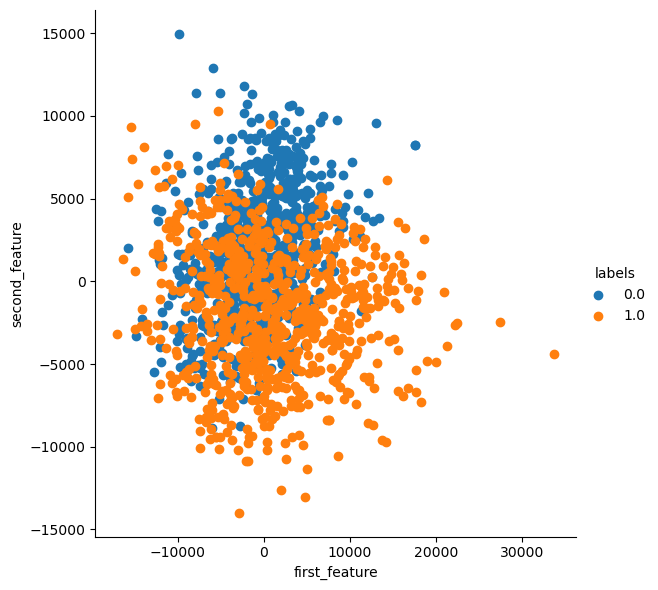

In [20]:
sns.FacetGrid(data=reduced_df,hue="labels",size=6).map(plt.scatter,'first_feature','second_feature').add_legend()
plt.show()

# Thanks for Studying.